In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [91]:
import pandas as pd
import csv

from sklearn import linear_model
from sklearn.metrics import r2_score

In [52]:
document = pd.read_csv('FuelConsumption.csv')
for row in document:
    print(row)
#Here we have the list of all row headings

MODELYEAR
MAKE
MODEL
VEHICLECLASS
ENGINESIZE
CYLINDERS
TRANSMISSION
FUELTYPE
FUELCONSUMPTION_CITY
FUELCONSUMPTION_HWY
FUELCONSUMPTION_COMB
FUELCONSUMPTION_COMB_MPG
CO2EMISSIONS


In [12]:
# The CSV HEAD:
document.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
document.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [17]:
#Print specific Columns
cdf = document[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(100)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
95,3.0,6,10.0,230
96,3.0,6,9.9,228
97,3.0,6,10.3,237
98,2.0,4,8.8,202


In [18]:
cdf1 = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
print(cdf1)

      CYLINDERS  ENGINESIZE  CO2EMISSIONS  FUELCONSUMPTION_COMB
0             4         2.0           196                   8.5
1             4         2.4           221                   9.6
2             4         1.5           136                   5.9
3             6         3.5           255                  11.1
4             6         3.5           244                  10.6
...         ...         ...           ...                   ...
1062          6         3.0           271                  11.8
1063          6         3.2           264                  11.5
1064          6         3.0           271                  11.8
1065          6         3.2           260                  11.3
1066          6         3.2           294                  12.8

[1067 rows x 4 columns]


Text(0, 0.5, 'CO2 EMMISSIONS')

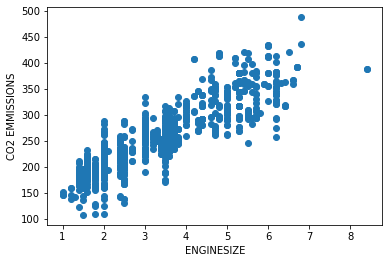

In [40]:
#Build Scatter Plot
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 EMMISSIONS')

In [68]:
#Train data : 80 percent
#Test data : 20 percent
msk = np.random.rand(len(document)) < 0.8
train = cdf[msk]
test = cdf[~msk]
regression = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]
test_x = test['ENGINESIZE']
test_y = test['CO2EMISSIONS']
regression.fit(train_x , train_y)


LinearRegression()


In [80]:
#Coefficient and Intercept
print("Coefficient : " , regression.coef_[0][0])
print("Intercept : " , regression.intercept_[0])

Coefficient :  39.573779759710106
Intercept :  124.08448101422545


In [81]:
coeff = regression.coef_[0][0]
intercept = regression.intercept_[0]

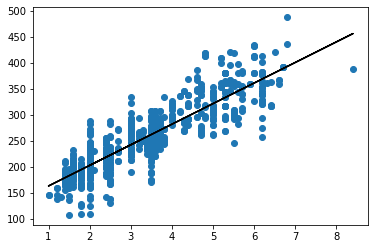

In [84]:
y = train_x*coeff + intercept
plt.scatter(train_x , train_y)
plt.plot(train_x , y , color="black")

In [92]:
#Use testing data to calculate accuracy

test_y_expected = (test_x*coeff + intercept)
#Print Mean, Mean square, r2

print("Mean : " , np.mean((test_y_expected - test_y)))
print("Mean Square: " , np.mean((test_y_expected - test_y)**2))
print("R2 Score : " , r2_score(test_y_expected , test_y) )

Mean :  1.4649847523097306
Mean Square:  885.6592484634832
R2 Score :  0.7082188398290868
